PREDICTIONS WITH IMBALANCED DATA TO PREDICT HEART DISEASE

Introducing the Heart Disease Prediction Model - it's doing its best to keep hearts healthy! 💪🩺

Disclaimer: The model is a work in progress, but we are committed to making it even better! 🛠️🚀


Data Pre-processing

In [1]:
import os
os.getcwd()

'C:\\Users\\HomePC'

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

file_path = 'downloads/heart/heart_2020_cleaned.csv'
df = pd.read_csv(file_path)

In [3]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7,0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6,Yes,No,No
319791,No,29.84,Yes,No,No,0,0,No,Male,35-39,Hispanic,No,Yes,Very good,5,Yes,No,No
319792,No,24.24,No,No,No,0,0,No,Female,45-49,Hispanic,No,Yes,Good,6,No,No,No
319793,No,32.81,No,No,No,0,0,No,Female,25-29,Hispanic,No,No,Good,12,No,No,No


In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [5]:
df.count()

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [9]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
df = df.drop_duplicates()

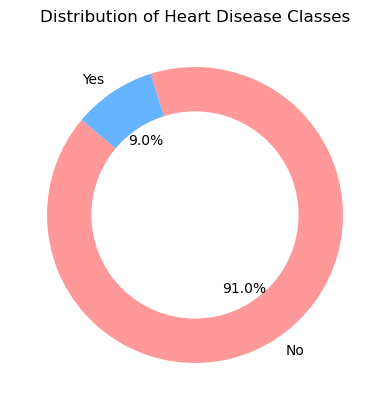

In [11]:
# Visualizing the heart disease data
heart_disease_counts = df['HeartDisease'].value_counts()


plt.figure(figsize=(4, 4))
plt.pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF9999','#66B3FF'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.title('Distribution of Heart Disease Classes')

plt.show()


In [12]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


In [13]:
X['AgeCategory'] = X['AgeCategory'].str.extract('(\d+)').astype(int)

In [14]:
binary_cols = ['Smoking','AlcoholDrinking','Stroke','DiffWalking','Diabetic',
               'PhysicalActivity','Asthma','KidneyDisease','SkinCancer']

for col in binary_cols:
    X[col] =LabelEncoder().fit_transform(X[col])

In [ ]:
#Displaying max rows and defaulting

In [ ]:
pd.set_option("diplay.max_rows",None)

In [ ]:
pd.reset_option("display.max_rows")

In [15]:
numerical_cols = ['BMI','PhysicalHealth','MentalHealth','SleepTime']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [16]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,-1.830820,1,0,0,-0.070301,3.183766,0,Female,55,White,2,1,Very good,-1.420852,1,0,1
1,-1.252600,0,0,1,-0.438823,-0.507054,0,Female,80,White,0,1,Very good,-0.057636,0,0,0
2,-0.287869,1,0,0,2.017986,3.183766,0,Male,65,White,2,1,Fair,0.623971,1,0,0
3,-0.654281,0,0,0,-0.438823,-0.507054,0,Female,75,White,0,0,Good,-0.739244,0,0,1
4,-0.731583,0,0,0,3.000709,-0.507054,1,Female,40,White,0,1,Very good,0.623971,0,0,0


In [17]:
categorical_columns = ['Sex', 'Race', 'GenHealth']
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X = X_encoded


In [18]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,Sex_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,-1.830820,1,0,0,-0.070301,3.183766,0,55,2,1,...,0,0,0,0,0,1,0,0,0,1
1,-1.252600,0,0,1,-0.438823,-0.507054,0,80,0,1,...,0,0,0,0,0,1,0,0,0,1
2,-0.287869,1,0,0,2.017986,3.183766,0,65,2,1,...,1,0,0,0,0,1,1,0,0,0
3,-0.654281,0,0,0,-0.438823,-0.507054,0,75,0,0,...,0,0,0,0,0,1,0,1,0,0
4,-0.731583,0,0,0,3.000709,-0.507054,1,40,0,1,...,0,0,0,0,0,1,0,0,0,1


Model Building

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [20]:
model_performance = {}

In [21]:
model_name = 'Logistic Regression'
model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


In [22]:
# Initialize an empty dictionary to store results
results_dict = {}

In [23]:
y_pred_test = model.predict(X_test)

# Combine X_test with its corresponding actual and predicted labels
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Count the occurrences of each value in 'Actual' and 'Predicted' columns
actual_counts = results_df['Actual'].value_counts()
predicted_counts = results_df['Predicted'].value_counts()

# Create DataFrames for the counts
actual_table = pd.DataFrame(actual_counts)
actual_table.columns = ['Counts']

predicted_table = pd.DataFrame(predicted_counts)
predicted_table.columns = ['Counts']

# Merge the two DataFrames on the index
merged_table = actual_table.merge(predicted_table, left_index=True, right_index=True, how='outer')
merged_table.columns = ['Actual Counts', 'Predicted Counts']

# Add the merged table to the results dictionary
results_dict['Logistic Regression'] = merged_table


In [24]:
model_name = 'Decision Tree'
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

In [25]:
y_pred_test = model.predict(X_test)
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

actual_counts = results_df['Actual'].value_counts()
predicted_counts = results_df['Predicted'].value_counts()

actual_table = pd.DataFrame(actual_counts)
actual_table.columns = ['Counts']

predicted_table = pd.DataFrame(predicted_counts)
predicted_table.columns = ['Counts']

merged_table = actual_table.merge(predicted_table, left_index=True, right_index=True, how='outer')
merged_table.columns = ['Actual Counts', 'Predicted Counts']

results_dict[ 'Decision Tree'] = merged_table

In [26]:
model_name = 'Random Forest'
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


In [27]:
y_pred_test = model.predict(X_test)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

actual_counts = results_df['Actual'].value_counts()
predicted_counts = results_df['Predicted'].value_counts()

actual_table = pd.DataFrame(actual_counts)
actual_table.columns = ['Counts']

predicted_table = pd.DataFrame(predicted_counts)
predicted_table.columns = ['Counts']

merged_table = actual_table.merge(predicted_table, left_index=True, right_index=True, how='outer')
merged_table.columns = ['Actual Counts', 'Predicted Counts']

results_dict['Random Forest'] = merged_table

In [28]:
model_name = 'Gradient Boosting'
model = GradientBoostingClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


In [29]:
y_pred_test = model.predict(X_test)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

actual_counts = results_df['Actual'].value_counts()
predicted_counts = results_df['Predicted'].value_counts()

actual_table = pd.DataFrame(actual_counts)
actual_table.columns = ['Counts']

predicted_table = pd.DataFrame(predicted_counts)
predicted_table.columns = ['Counts']

merged_table = actual_table.merge(predicted_table, left_index=True, right_index=True, how='outer')
merged_table.columns = ['Actual Counts', 'Predicted Counts']

results_dict[ 'Gradient Boosting'] = merged_table

In [30]:
model_name = 'Neural Network'
model = MLPClassifier(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')

model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }


In [31]:
y_pred_test = model.predict(X_test)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

actual_counts = results_df['Actual'].value_counts()
predicted_counts = results_df['Predicted'].value_counts()

actual_table = pd.DataFrame(actual_counts)
actual_table.columns = ['Counts']

predicted_table = pd.DataFrame(predicted_counts)
predicted_table.columns = ['Counts']

merged_table = actual_table.merge(predicted_table, left_index=True, right_index=True, how='outer')
merged_table.columns = ['Actual Counts', 'Predicted Counts']

results_dict['Neural Network'] = merged_table

Model Evaluation

In [32]:
for model_name, metrics in model_performance.items():
    print(f'Model: {model_name}')
    print(f'Accuracy: {metrics["Accuracy"]}')
    print(f'Precision: {metrics["Precision"]}')
    print(f'Recall: {metrics["Recall"]}')
    print(f'F1 Score: {metrics["F1 Score"]}')
    print('-' * 30)

Model: Logistic Regression
Accuracy: 0.91071191833488
Precision: 0.5279783393501805
Recall: 0.10733944954128441
F1 Score: 0.17840805123513268
------------------------------
Model: Decision Tree
Accuracy: 0.8545340050377834
Precision: 0.22622573214873315
Recall: 0.25229357798165136
F1 Score: 0.2385496183206107
------------------------------
Model: Random Forest
Accuracy: 0.8980511732732335
Precision: 0.3221884498480243
Recall: 0.11669724770642202
F1 Score: 0.17133620689655174
------------------------------
Model: Gradient Boosting
Accuracy: 0.9115239294710328
Precision: 0.5614617940199336
Recall: 0.09302752293577982
F1 Score: 0.15960963324413663
------------------------------
Model: Neural Network
Accuracy: 0.9109107782049582
Precision: 0.5368525896414342
Recall: 0.09889908256880733
F1 Score: 0.16702819956616052
------------------------------


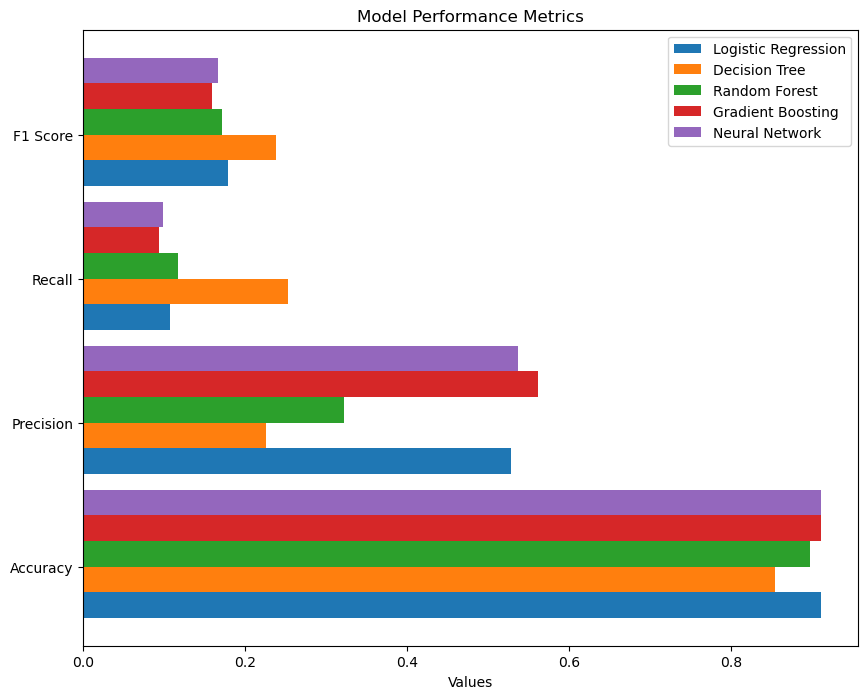

In [33]:
metrics = ['Accuracy', 'Precision','Recall','F1 Score']

# Get the list of model names
model_names = list(model_performance.keys())

fig, ax = plt.subplots(figsize=(10, 8))

num_metrics = len(metrics)
num_models = len(model_performance)
total_width = 0.8
width = total_width / num_models

pos = np.arange(num_metrics) * (total_width + 0.1)

for i, (model_name, metrics_dict) in enumerate(model_performance.items()):
    values = [metrics_dict[metric] for metric in metrics]

    plt.barh(pos + i * width, values, width, label=model_name)

ax.set_yticks(pos + ((num_metrics-1) / 2) * width)
ax.set_yticklabels(metrics)
ax.set_xlabel('Values')
ax.set_title('Model Performance Metrics')
plt.legend()

plt.show()


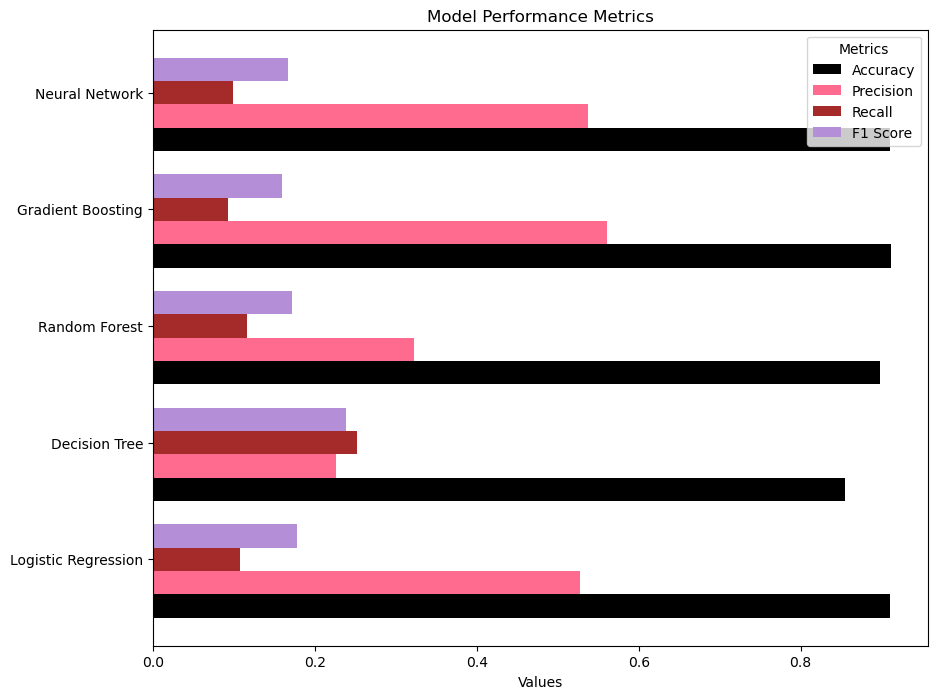

In [35]:
colors = ['#000000', '#FF6B8E', 'brown','#B48FD8']

fig, ax = plt.subplots(figsize=(10, 8))

pos = np.arange(len(model_names))
width = 0.2
for i, metric in enumerate(metrics):
    values = [model_performance[model_name][metric] for model_name in model_names]
    
    plt.barh(pos + i * width, values, width, label=metric, color=colors[i])

ax.set_yticks(pos + (len(metrics) / 2) * width)
ax.set_yticklabels(model_names)
ax.set_xlabel('Values')
ax.set_title('Model Performance Metrics')
plt.legend(title='Metrics', loc='upper right')

plt.show()


In [36]:
for model_name, results_table in results_dict.items():
    print(f"Model: {model_name}")
    print(results_table)
    print('-' * 50)


Model: Logistic Regression
     Actual Counts  Predicted Counts
No           54894             59236
Yes           5450              1108
--------------------------------------------------
Model: Decision Tree
     Actual Counts  Predicted Counts
No           54894             54266
Yes           5450              6078
--------------------------------------------------
Model: Random Forest
     Actual Counts  Predicted Counts
No           54894             58370
Yes           5450              1974
--------------------------------------------------
Model: Gradient Boosting
     Actual Counts  Predicted Counts
No           54894             59441
Yes           5450               903
--------------------------------------------------
Model: Neural Network
     Actual Counts  Predicted Counts
No           54894             59340
Yes           5450              1004
--------------------------------------------------


CONCLUSIONS:

Decision tree is the most promising model

Greatest con is the poor recall which means that the model is missing a significant number of true positives